In [1]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [51]:
import os
import pandas as pd
from utils import (
    ESTACIONES_XLSX,
    NCEP_NCAR_XLSX,
    NDEFM_XLSX,
    PREDICTIONS_FOLDER
)
from sklearn.metrics import mean_absolute_error

In [78]:
df_maximos = pd.read_excel(ESTACIONES_XLSX, sheet_name=1, header=1, parse_dates=['Año hid'])
df_anuales = pd.read_excel(ESTACIONES_XLSX, sheet_name=2, header=1, parse_dates=['Año hid'])

target = 'San Luis Tucuman'

df_maximos = df_maximos[['Año hid', target]]

df_anuales = df_anuales[['Año hid', target]]

df_data_slt = pd.merge(
    df_maximos,
    df_anuales,
    how='inner',
    left_on='Año hid',
    right_on='Año hid',
    suffixes=('_max', '_anual')
).rename(
    columns={'Año hid':'ds', 'San Luis Tucuman_max':'y', 'San Luis Tucuman_anual':'anual'}
).set_index('ds')

df_data_slt = df_data_slt[df_data_slt.any(axis=1).cumsum().astype(bool)]

In [88]:
df_train, df_test = df_data_slt[:-10], df_data_slt[-10:]

mean = df_train.y.mean()

df_test = df_test.assign(pred=mean)

mean_absolute_error(df_test.y, df_test.pred)

23.330434782608695

In [89]:
df_data_slt = df_data_slt.assign(pred=df_data_slt.y.mean())
df_data_slt[-10:].reset_index(drop=True)[['pred']].to_csv(
    os.path.join(PREDICTIONS_FOLDER, 'simple_mean.csv'),
    header=False
)

## Pero estamos minimizando MAE, no MSE!

In [90]:
df_maximos = pd.read_excel(ESTACIONES_XLSX, sheet_name=1, header=1, parse_dates=['Año hid'])
df_anuales = pd.read_excel(ESTACIONES_XLSX, sheet_name=2, header=1, parse_dates=['Año hid'])

target = 'San Luis Tucuman'

df_maximos = df_maximos[['Año hid', target]]

df_anuales = df_anuales[['Año hid', target]]

df_data_slt = pd.merge(
    df_maximos,
    df_anuales,
    how='inner',
    left_on='Año hid',
    right_on='Año hid',
    suffixes=('_max', '_anual')
).rename(
    columns={'Año hid':'ds', 'San Luis Tucuman_max':'y', 'San Luis Tucuman_anual':'anual'}
).set_index('ds')

df_data_slt = df_data_slt[df_data_slt.any(axis=1).cumsum().astype(bool)]

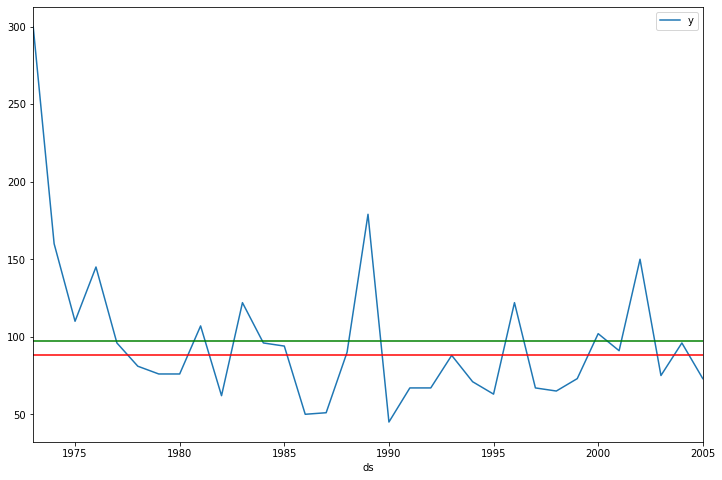

In [101]:
ax = df_data_slt.set_index(df_data_slt.index.map(lambda x: x.year))[['y']].plot(kind='line', figsize=(12,8));
ax.axhline(y=df_data_slt.y.mean(), color='green', label='mean');
ax.axhline(y=df_data_slt.y.median(), color='red', label='median');

In [102]:
df_train, df_test = df_data_slt[:-10], df_data_slt[-10:]

median = df_train.y.median()

df_test = df_test.assign(pred=median)

mean_absolute_error(df_test.y, df_test.pred)

20.8

In [93]:
df_data_slt = df_data_slt.assign(pred=df_data_slt.y.median())
df_data_slt[-10:].reset_index(drop=True)[['pred']].to_csv(
    os.path.join(PREDICTIONS_FOLDER, 'simple_median.csv'),
    header=False
)